## Importing neccessary modules

In [1]:
import pandas as pd
import numpy as np
import math
from math import cos , sin
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
import matplotlib
warnings.filterwarnings("ignore")

In [2]:
def PointsInCircum(r, n=100):
    np.random.seed(42) 
    return [(math.cos(2*math.pi/n*x)*r + np.random.normal(-20, 20),
             math.sin(2*math.pi/n*x)*r + np.random.normal(-20, 20)) for x in range(1, n+1)]

In [3]:
x=PointsInCircum(400, 600)+ PointsInCircum(250, 700)  + PointsInCircum(90, 400)  

In [4]:
noise = pd.DataFrame([np.random.randint(-30, 30), np.random.randint(-30, 30)] for i in range(len(x)))
x= pd.DataFrame(x)


In [5]:
x=noise+x

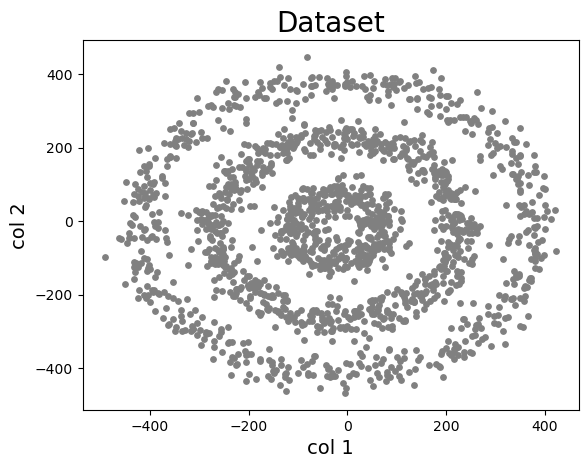

In [6]:
plt.scatter(x[0], x[1], s=15, c='gray')
plt.title("Dataset", fontsize = 20)
plt.xlabel("col 1", fontsize = 14)
plt.ylabel("col 2", fontsize=14)
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans=KMeans(n_clusters=3)
labels_kmeans=kmeans.fit_predict(x)

x["Kmeans_labels"]=labels_kmeans

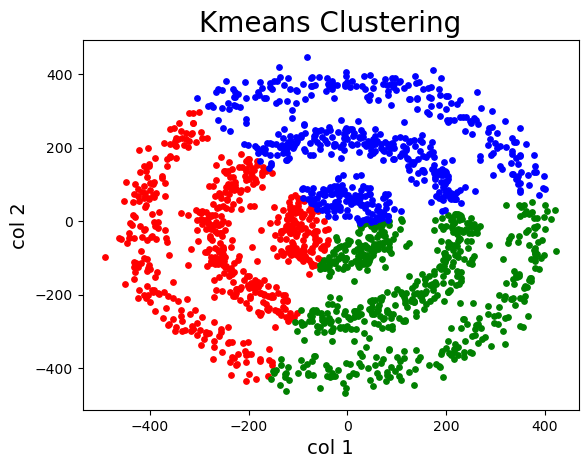

In [9]:
plt.scatter(x[x.Kmeans_labels==0][0],x[x.Kmeans_labels==0][1], s=15, c='red')
plt.scatter(x[x.Kmeans_labels==1][0],x[x.Kmeans_labels==1][1], s=15, c='green')
plt.scatter(x[x.Kmeans_labels==2][0],x[x.Kmeans_labels==2][1], s=15, c='blue')
plt.title("Kmeans Clustering", fontsize = 20)
plt.xlabel("col 1", fontsize = 14)
plt.ylabel("col 2", fontsize=14)
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering as hier

agmc=hier(n_clusters=3)

agmc_labels=agmc.fit_predict(x[[0,1]])

x["Agmc_labels"]=agmc_labels

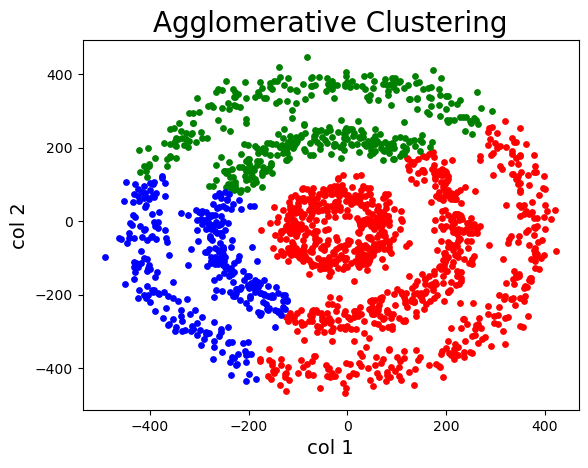

In [11]:
plt.scatter(x[x.Agmc_labels==0][0],x[x.Agmc_labels==0][1], s=15, c='red')
plt.scatter(x[x.Agmc_labels==1][0],x[x.Agmc_labels==1][1], s=15, c='green')
plt.scatter(x[x.Agmc_labels==2][0],x[x.Agmc_labels==2][1], s=15, c='blue')
plt.title("Agglomerative Clustering", fontsize = 20)
plt.xlabel("col 1", fontsize = 14)
plt.ylabel("col 2", fontsize=14)
plt.show()

## Model building DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

db=DBSCAN()
db_labels=db.fit_predict(x[[0,1]])
x["Db_labels"]=db_labels+2

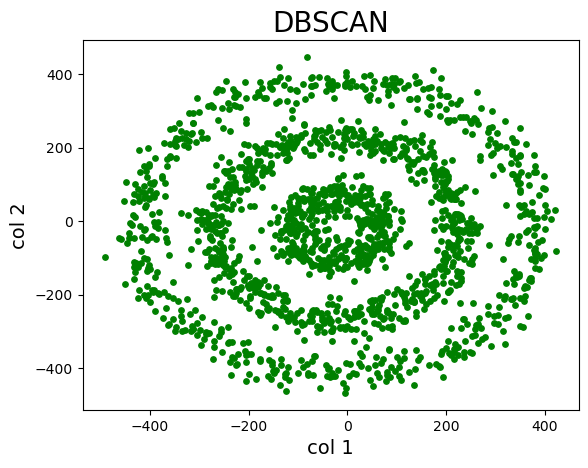

In [13]:
plt.scatter(x[x.Db_labels==0][0],x[x.Db_labels==0][1], s=15, c='red')
plt.scatter(x[x.Db_labels==1][0],x[x.Db_labels==1][1], s=15, c='green')
plt.scatter(x[x.Db_labels==2][0],x[x.Db_labels==2][1], s=15, c='blue')
plt.title("DBSCAN", fontsize = 20)
plt.xlabel("col 1", fontsize = 14)
plt.ylabel("col 2", fontsize=14)
plt.show()

## Finding best hyperparameters

In [14]:
from sklearn.neighbors import NearestNeighbors
neighs=NearestNeighbors(n_neighbors=3)
neighs.fit(x[[0,1]])
distances,index=neighs.kneighbors(x[[0,1]])

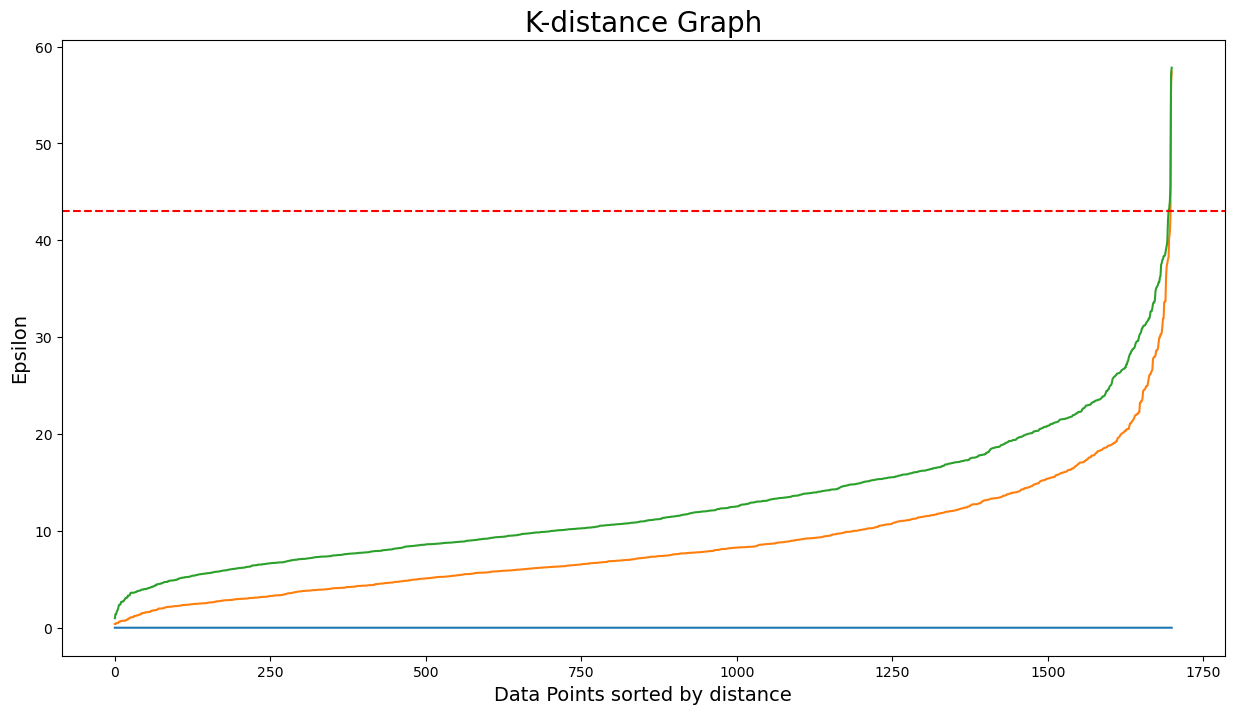

In [15]:
distances=np.sort(distances,axis=0)
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=43, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [16]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=30,min_samples=12)
db_labels=db.fit_predict(x[[0,1]])
x["Db_labels"]=db_labels+1

## Best min number of samples

In [17]:
eps=43
for min_samples in [11, 12, 13, 14]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(x[[0,1]])
    x1= cluster_labels +2
    y = np.bincount(x1)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    print()

eps= 43 | min_samples=  11 | obtained clustering:  [(1, 9), (2, 592), (3, 700), (4, 399)]

eps= 43 | min_samples=  12 | obtained clustering:  [(1, 11), (2, 179), (3, 140), (4, 134), (5, 136), (6, 701), (7, 399)]

eps= 43 | min_samples=  13 | obtained clustering:  [(1, 21), (2, 129), (3, 46), (4, 137), (5, 33), (6, 61), (7, 36), (8, 137), (9, 701), (10, 399)]

eps= 43 | min_samples=  14 | obtained clustering:  [(1, 30), (2, 124), (3, 42), (4, 139), (5, 31), (6, 38), (7, 24), (8, 36), (9, 80), (10, 56), (11, 701), (12, 399)]



In [18]:
X=x

In [19]:
dbscan_opt=DBSCAN(eps=45,min_samples=13)
dbscam=dbscan_opt.fit(X[[0,1]])

In [20]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_

In [21]:
colors = ["purple","red","blue","green"]

Silhouette Coefficient: 0.534


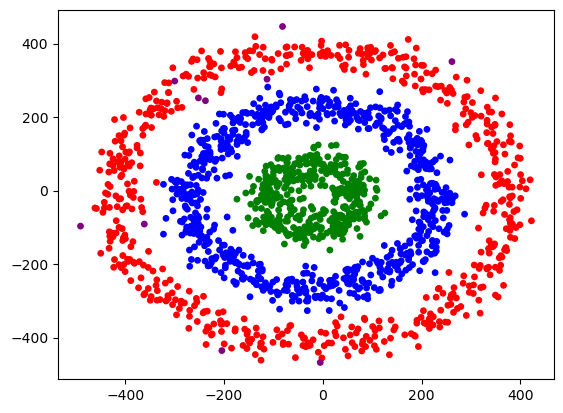

In [22]:
plt.scatter(X[0], X[1], c=X['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % (-metrics.silhouette_score(X, X['DBSCAN_opt_labels'])+0.5))

## Conclusion
A Silhouette Coefficient of 0.534 for a DBSCAN clustering algorithm indicates that the clustering results are moderately good.
A value of 0.534 means that the average distance between points in the same cluster is greater than the average distance between points in different clusters. 
This suggests that the algorithm has identified reasonably well-separated clusters in the data.